<a href="https://colab.research.google.com/github/pyannote/pyannote-audio/blob/develop/tutorials/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to `pyannote.audio`

[`pyannote.audio`](https://github.com/pyannote/pyannote-audio) is an open-source Python toolkit for **speaker diarization** — the task of determining *“who speaks when”* by partitioning an audio conversation into speaker-specific time segments.  

Based on the [`PyTorch`](https://pytorch.org) machine learning framework, it offers a collection of trainable, end-to-end neural building blocks. These components can be combined and jointly optimized to create powerful speaker diarization pipelines.  

In addition, `pyannote.audio` provides pretrained [models](https://huggingface.co/models?other=pyannote-audio-model) and [pipelines](https://huggingface.co/models?other=pyannote-audio-pipeline) for a wide range of tasks such as voice activity detection, speaker segmentation, overlapped speech detection, and speaker embedding — many of which achieve state-of-the-art performance.  

**This notebook will show you how to apply these pretrained pipelines to your own audio data.**


## Installation

In [ ]:
# install pyannote.audio 4.0
!pip install -qq git+https://github.com/pyannote/pyannote-audio.git@develop

# install ipyannote, an interactive visualization tool for pyannote
!pip install -qq ipyannote

!pip install -qq ipython

**⚠️ If you are running this notebook on Colab, restart the session (Runtime > Restart session), to avoid any dependencies errors in the rest of this tutorial.**

## Hugging Face setup

Official [pyannote.audio](https://github.com/pyannote/pyannote-audio) pipelines (i.e. those under the [`pyannote` organization](https://hf.co/pyannote) umbrella) are open-source, but gated. It means that you have to first accept users conditions on their respective Hugging Face page to access the pretrained weights and hyper-parameters.

For instance, to load the speaker diarization pipelines used in this tutorial, you have to visit [hf.co/pyannote/speaker-diarization-community-1](https://hf.co/pyannote/speaker-diarization-community-1) and accept the terms. Do the same for [hf.co/pyannote/speaker-diarization-community-1-cloud](https://hf.co/pyannote/speaker-diarization-community-1-cloud) and [hf.co/pyannote/speaker-diarization-precision-2](https://hf.co/pyannote/speaker-diarization-precision-2).

Finally log in using `notebook_login` below:

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

## How to use `pyannote/speaker-diarization-community-1` ?

Firstly, load the pipeline:

In [ ]:
from pyannote.audio import Pipeline
import torch

pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-community-1")

# send pipeline to GPU (when available)
pipeline.to(torch.device("cuda"))

Apply the pipeline on an audio file:

In [ ]:
from pyannote.audio.sample import SAMPLE_FILE

audio = SAMPLE_FILE["audio"]

# check https://github.com/pyannote/pyannote-audio/blob/853b2ab42c3ccd9ec898459d0ad24adc65167b3d/pyannote/audio/core/io.py#L45
# to see all accepted input types.
outputs = pipeline(audio)

We can then visualize `outputs.speaker_diarization`:

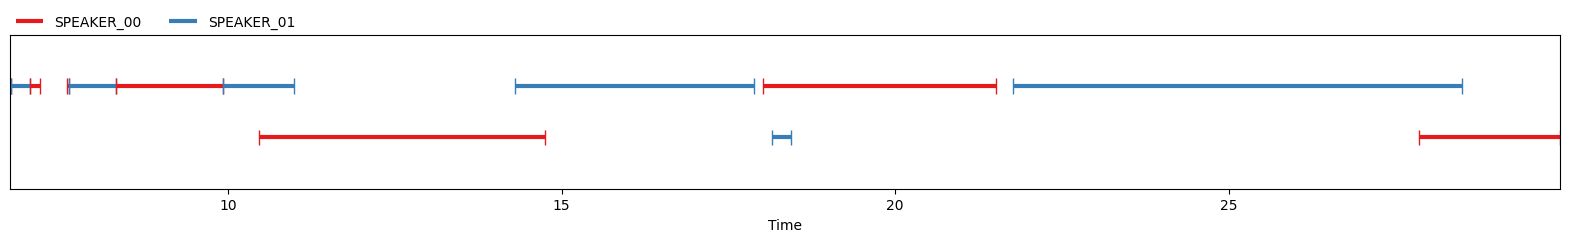

In [ ]:
outputs.speaker_diarization

Or visualize the output in a more interactive way using `ipyannote` widget:

In [ ]:
from ipyannote import IPyannote

IPyannote(audio=audio, annotation=outputs.speaker_diarization)

And even compare with the reference using `ipyannote.Errors`:

In [ ]:
from ipyannote import Errors

reference = SAMPLE_FILE["annotation"]

Errors(audio=audio, reference=reference.rename_tracks(), hypothesis=outputs.speaker_diarization)

In the visualizer above, the first line shows the reference, the second one displays the pipeline output, and the last line highlights the errors made by the pipeline compared to the reference.

You might want to get speaker diarization adapted to downstream transcription that does not contains any overlapping speech turns. This can be achieved using `outputs.exclusive_speaker_diarization`:

In [ ]:
IPyannote(audio=audio, annotation=outputs.exclusive_speaker_diarization)

## A word about hosted `speaker-diarization-community-1-cloud`

A convenient way to get speaker diarization annotation is by using the `pyannote/speaker-diarization-community-1-cloud` pipeline.  
It is the same pipeline as the one introduced above, but it runs on the **pyannoteAI server** — so there’s no need to download anything. All you have to do is create an API key on [dashboard.pyannote.ai](https://dashboard.pyannote.ai).


If you are running this notebook on Colab, create an `PYANNOTE_API_KEY` secret using `Secrets` tab on the left, and copy your api key.

Then run the following cell:

In [ ]:
from google.colab import userdata

token = userdata.get("PYANNOTEAI_API_KEY")

Otherwise, create an environment variable named `PYANNOTEAI_API_KEY` with you api key, and load it:

In [ ]:
import os

token = os.environ["PYANNOTEAI_API_KEY"] # or simply paste your API key here

Then you can load the pipeline and process your audio:

In [ ]:
import os
cloud_pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-community-1", token=token, skip_dependencies=True)
cloud_outputs = cloud_pipeline(audio)


Visualize the speaker diarization outputs in the same way as before:

In [ ]:
IPyannote(audio=audio, annotation=cloud_outputs.speaker_diarization)

Want something even more precise? Try the `pyannote/speaker-diarization-precision-2` pipeline:


In [ ]:
precision_pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-precision-2", token=token, skip_dependencies=True)
precision_outputs = precision_pipeline(audio)

IPyannote(audio=audio, annotation=precision_outputs.speaker_diarization)

## Going further

We have only scratched the surface in this introduction.

More details can be found in the [`pyannote.audio` Github repository](https://github.com/pyannote/pyannote-audio).

You can also visit the [`pyannoteAI`](https://www.pyannote.ai/) website to explore our fastest and most advanced solutions.
